# Artificial Intelligence for Cybersecurity Incidents Prediction

**Paper's abstract**:
This report describes the introduction of artificial intelligence for cybersecurity Incident Prediction to increase effectiveness cybersecurity response and reducing company expenses. The project was performed using CRISP-DM methodology for the company that provides security services to government agencies according to its business goals. The introduction of the project allowed the company to transform own business strategy and reduce expenses for insurance payments. This paper's iteration describes all phases of the CRISP-DM.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2. Stage Two - Data Understanding

### 2.1. Collect Initial Data

In [2]:
filename = 'https://raw.githubusercontent.com/dyussekeyev/security-incidents-prediction/main/security-incidents.csv'
data = pd.read_csv(filename, sep = ';')

### 2.2. Data Description

In [3]:
data.shape

(35280, 3)

In [4]:
data.columns

Index(['Dates', 'Category', 'Customer'], dtype='object')

In [5]:
data.dtypes

Dates       object
Category    object
Customer    object
dtype: object

In [6]:
data.head()

,Dates,Category,Customer
0,29.04.2021 22:18,SPAM,E-GOV DATA CENTER
1,29.04.2021 21:00,PHISHING,OFFICE OF THE PRIME-MINISTER
2,29.04.2021 18:49,MALWARE,HOUSE OF MINISTRIES
3,29.04.2021 18:00,DDOS,HOUSE OF MINISTRIES
4,29.04.2021 18:00,DDOS,HOUSE OF MINISTRIES


In [7]:
data.describe()

,Dates,Category,Customer
count,35280,35280,35280
unique,30535,11,10
top,05.10.2011 4:30,SPAM,HOUSE OF MINISTRIES
freq,6,6556,8102


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35280 entries, 0 to 35279
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Dates     35280 non-null  object
 1   Category  35280 non-null  object
 2   Customer  35280 non-null  object
dtypes: object(3)
memory usage: 827.0+ KB


### 2.3. Data Exploration

In [9]:
def show_plot(df, column):
  plt.rcParams['figure.figsize'] = (10, 5)
  sns.countplot(df[column])
  plt.title('Amount of incidents by '+column)
  plt.xticks(rotation = 90)
  plt.show()

In [10]:
def count_values_table(df):
    count_val = df.value_counts()
    count_val_percent = 100 * df.value_counts() / len(df)
    count_val_table = pd.concat([count_val, count_val_percent.round(1)], axis=1)
    count_val_table_ren_columns = count_val_table.rename(
    columns = {0 : 'Count Values', 1 : '% of Total Values'})
    
    return count_val_table_ren_columns

count_values_table(data.Customer)

,Customer,Customer
HOUSE OF MINISTRIES,8102,23.0
AKIMAT OF THE NUR-SULTAN,5037,14.3
E-GOV DATA CENTER,4508,12.8
MINISTRY OF DEFENCE,3913,11.1
POLICE DEPARTMENT,3705,10.5
SUPREME COURT,2679,7.6
OFFICE OF THE PRIME-MINISTER,2082,5.9
MINISTRY OF DIGITAL DEVELOPMENT,1971,5.6
PARLIAMENT,1942,5.5
OFFICE OF THE PRESIDENT,1341,3.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


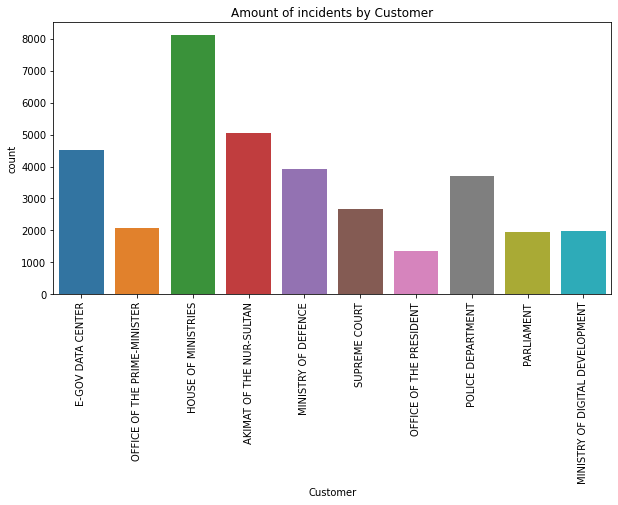

In [11]:
show_plot(data, 'Customer')

In [12]:
count_values_table(data.Category)

,Category,Category
SPAM,6556,18.6
WEBSITE UNAVAILABILITY,6538,18.5
PHISHING,4177,11.8
MALWARE,3938,11.2
BOTNET,3905,11.1
DDOS,2128,6.0
UNAUTHORIZED ACCESS,2125,6.0
NETWORK ATTACK,1762,5.0
INTERNAL OFFENER,1762,5.0
SECURITY SYSTEM FAULT,1354,3.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


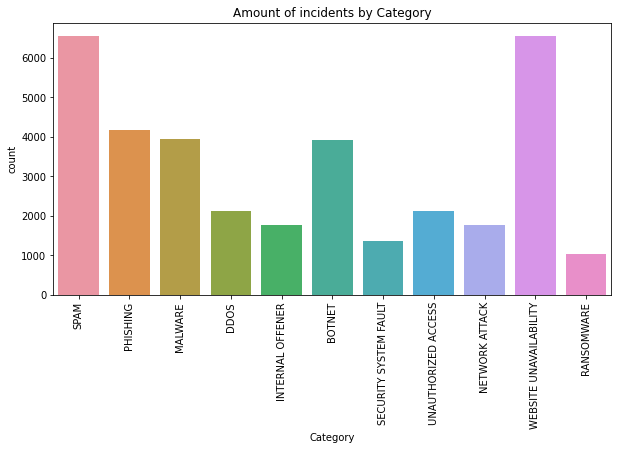

In [13]:
show_plot(data, 'Category')

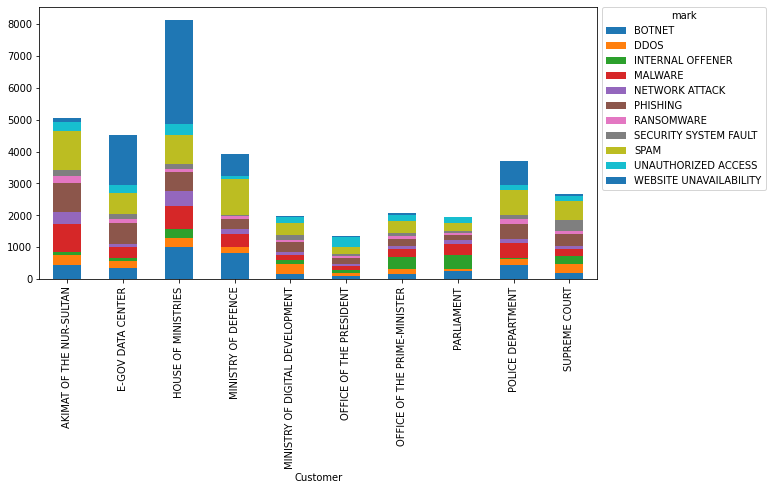

In [14]:
ct = pd.crosstab(data['Customer'], data['Category'])
ax = ct.plot(kind='bar', stacked=True, rot=90)
ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

### 2.4. Verify Data Quality

In [15]:
data.isnull().sum()

Dates       0
Category    0
Customer    0
dtype: int64

In [16]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [17]:
missing_values_table(data)

Your selected dataframe has 3 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## 3. Stage Three - Data Preparation

### 3.1. Selecting Data

In [18]:
# remove 'Customer' column
data.drop(columns=['Customer'])

# limit dataset - only new data
data = data[:9544]

### 3.2. Data Cleaning

In [19]:
# no data to be cleaned
pass

### 3.3. Constructing New Data

In [20]:
new_data = data.copy(deep = True)
new_data['Datetime'] = pd.to_datetime(new_data['Dates'], format='%d.%m.%Y %H:%M')

# construct 'Hour' column
new_data['Hour'] = new_data['Datetime'].dt.hour

# construct 'Period' column
period = []
for x in new_data['Hour']:
    period.append(x // 3)
new_data['Period'] = period

# construct 'Day-of-Week' column
new_data['DoW'] = new_data['Datetime'].dt.dayofweek

# construct 'Day-of-Month' column
new_data['DoM'] = new_data['Datetime'].dt.day

# construct 'Month' column
new_data['Month'] = new_data['Datetime'].dt.month

# briefly view new data
new_data

,Dates,Category,Customer,Datetime,Hour,Period,DoW,DoM,Month
0,29.04.2021 22:18,SPAM,E-GOV DATA CENTER,2021-04-29 22:18:00,22,7,3,29,4
1,29.04.2021 21:00,PHISHING,OFFICE OF THE PRIME-MINISTER,2021-04-29 21:00:00,21,7,3,29,4
2,29.04.2021 18:49,MALWARE,HOUSE OF MINISTRIES,2021-04-29 18:49:00,18,6,3,29,4
3,29.04.2021 18:00,DDOS,HOUSE OF MINISTRIES,2021-04-29 18:00:00,18,6,3,29,4
4,29.04.2021 18:00,DDOS,HOUSE OF MINISTRIES,2021-04-29 18:00:00,18,6,3,29,4
...,...,...,...,...,...,...,...,...,...
9539,01.01.2018 0:01,RANSOMWARE,AKIMAT OF THE NUR-SULTAN,2018-01-01 00:01:00,0,0,0,1,1
9540,01.01.2018 0:01,RANSOMWARE,AKIMAT OF THE NUR-SULTAN,2018-01-01 00:01:00,0,0,0,1,1
9541,01.01.2018 0:01,RANSOMWARE,MINISTRY OF DEFENCE,2018-01-01 00:01:00,0,0,0,1,1
9542,31.12.2017 19:17,UNAUTHORIZED ACCESS,E-GOV DATA CENTER,2017-12-31 19:17:00,19,6,6,31,12


### 3.4. Integrating New Data

In [21]:
# no data to be integrated

#### Return to previous stages and explore the data for derived columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


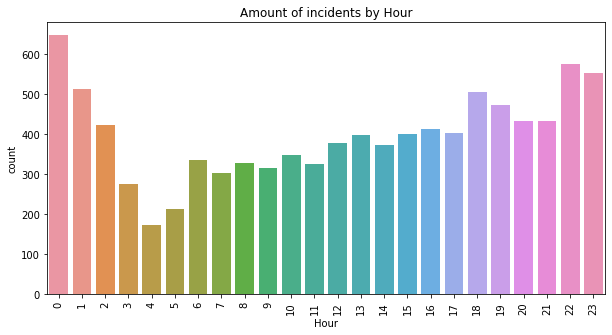

In [22]:
show_plot(new_data, 'Hour')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


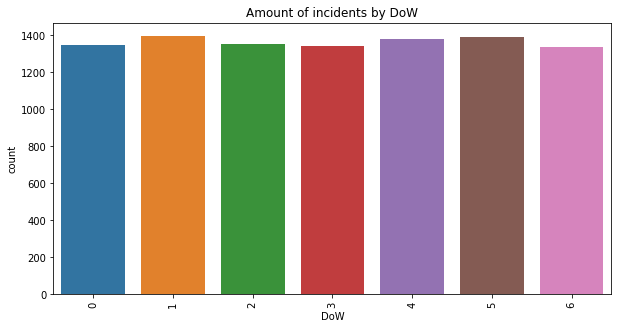

In [23]:
show_plot(new_data, 'DoW')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


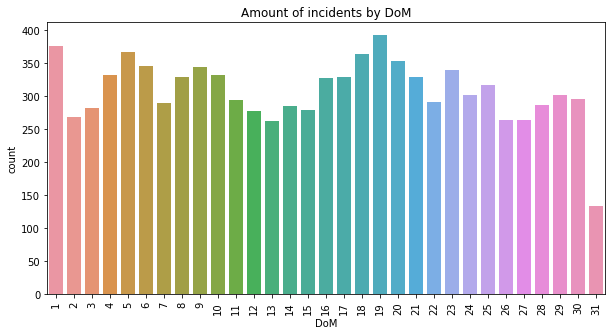

In [24]:
show_plot(new_data, 'DoM')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


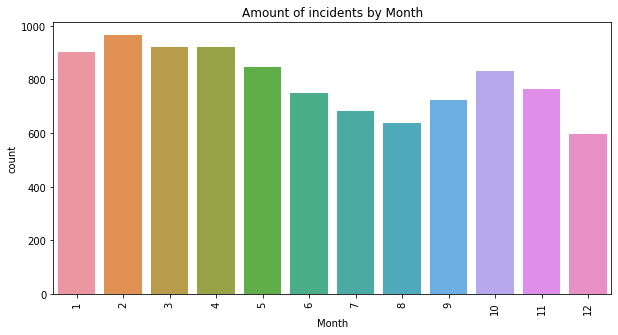

In [25]:
show_plot(new_data, 'Month')

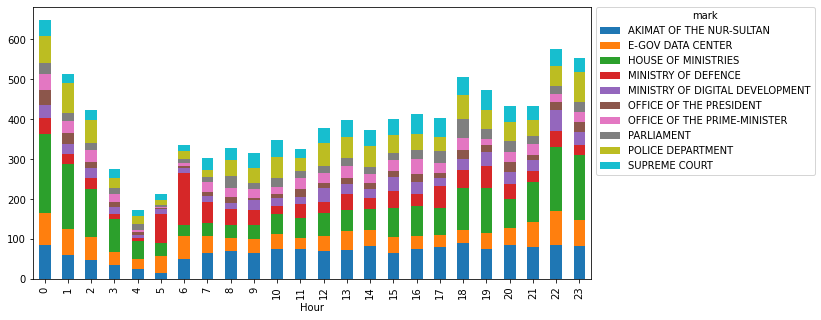

In [26]:
ct = pd.crosstab(new_data['Hour'], new_data['Customer'])
ax = ct.plot(kind='bar', stacked=True, rot=90)
ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

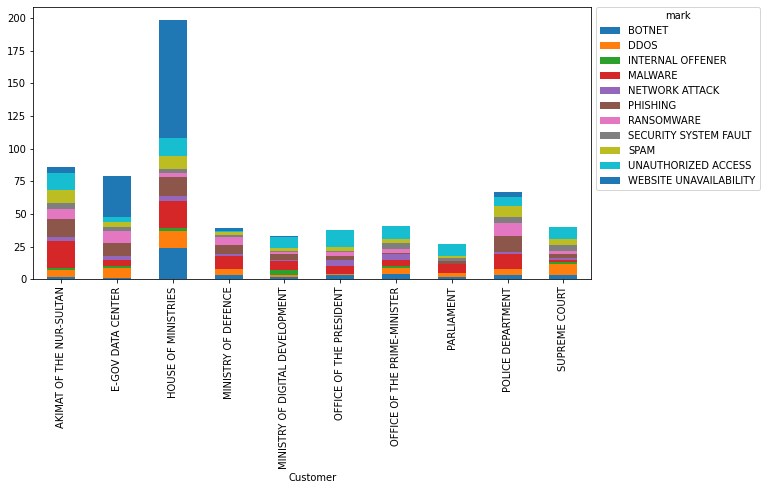

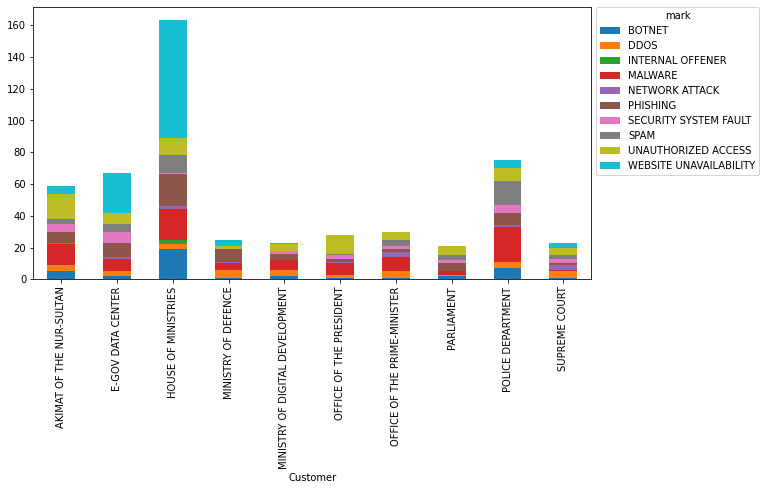

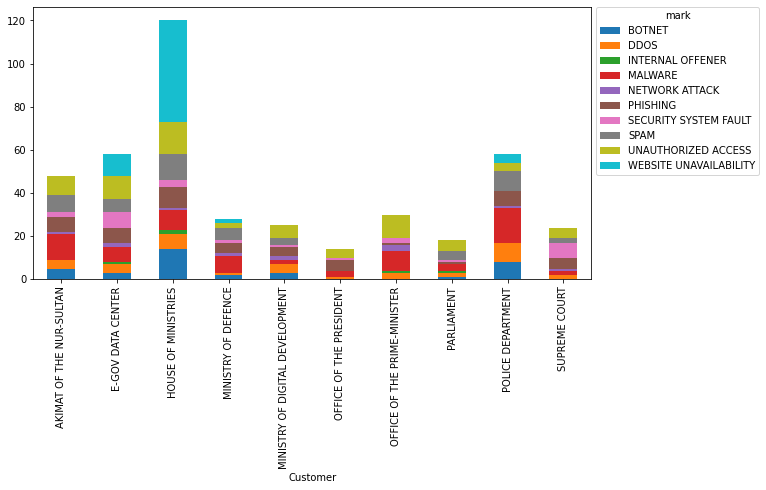

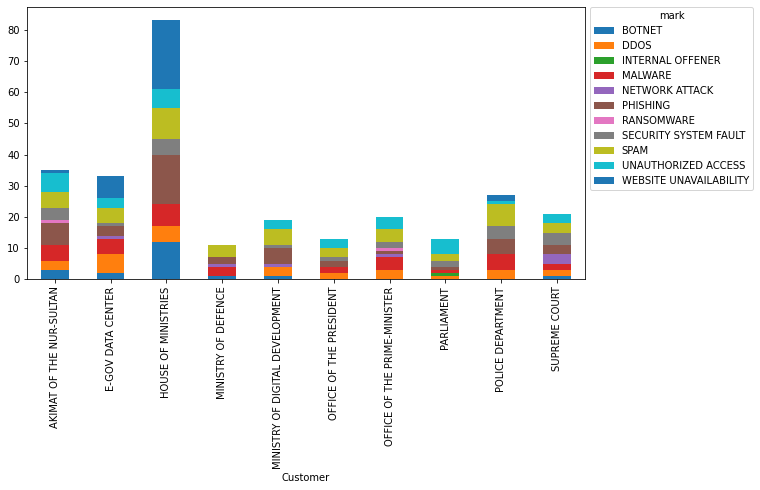

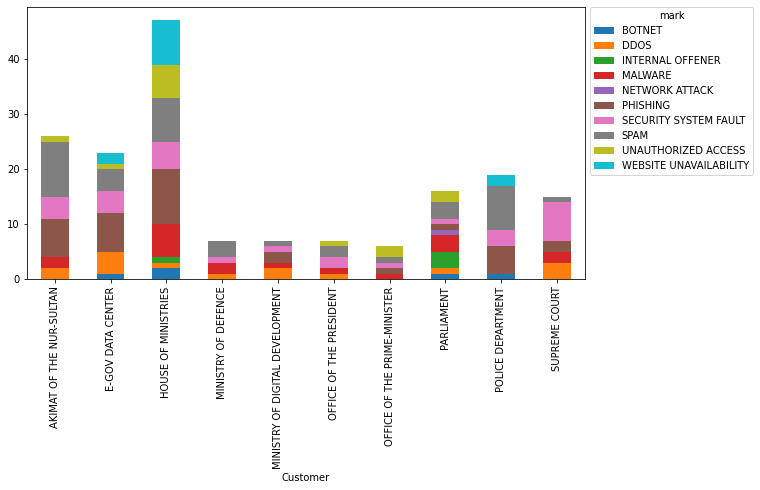

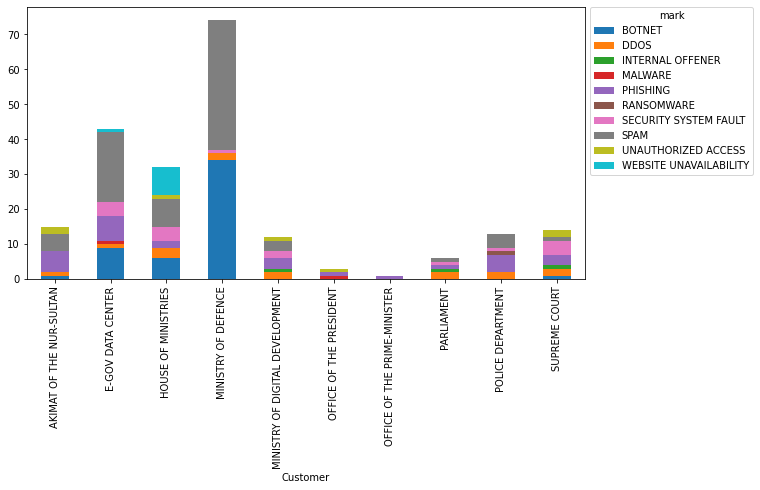

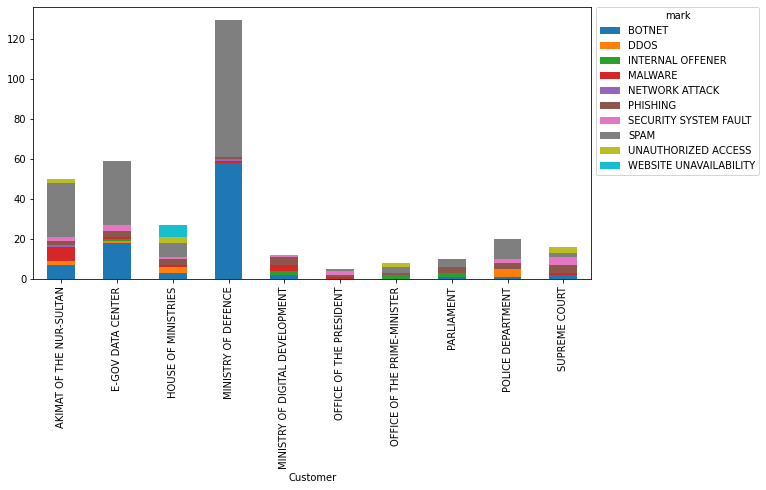

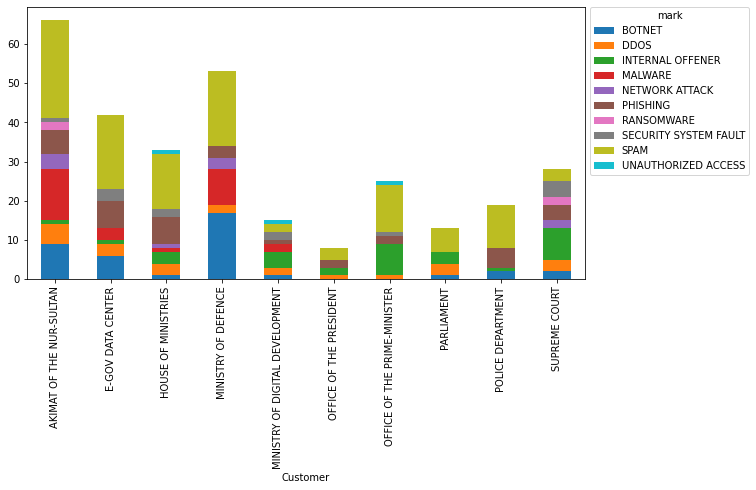

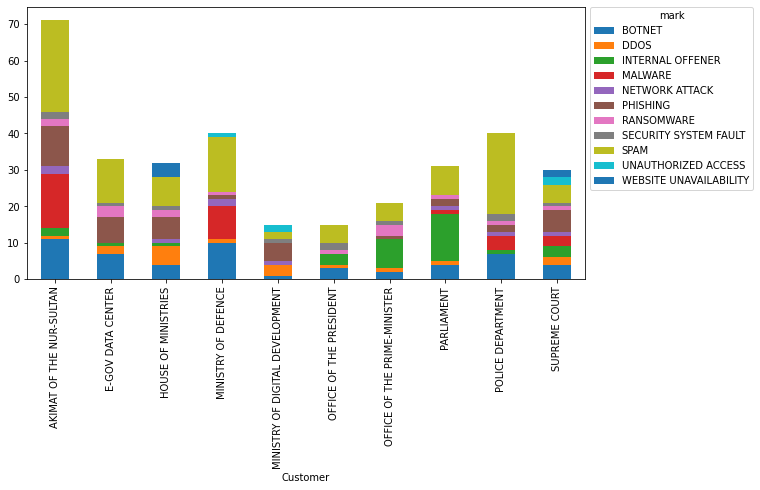

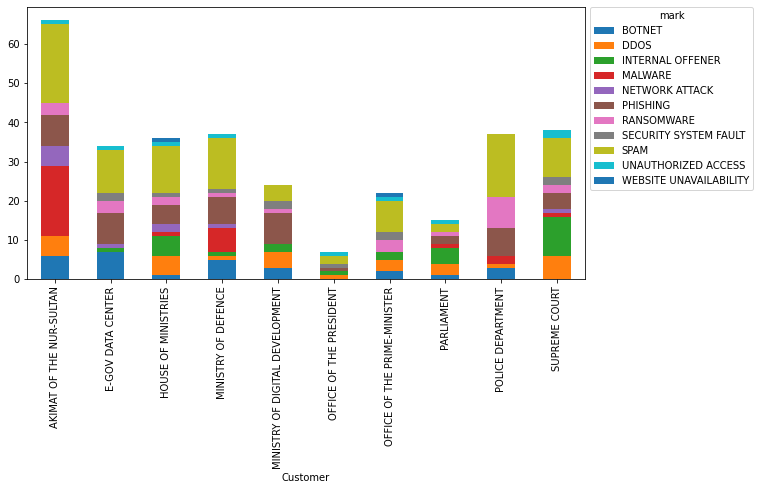

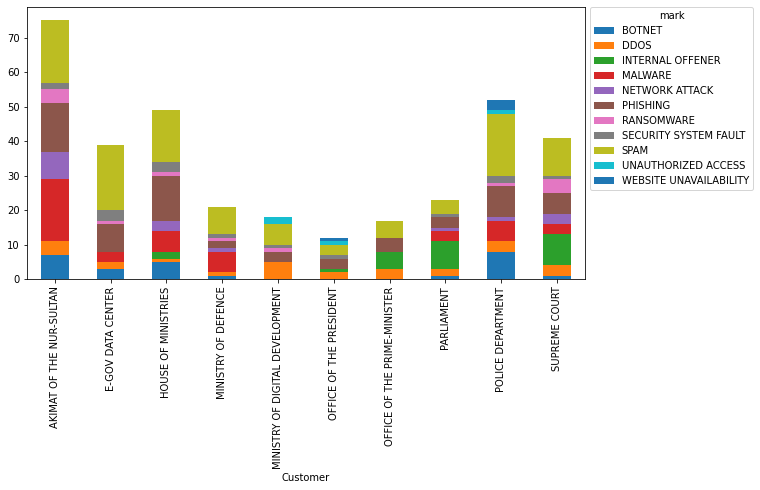

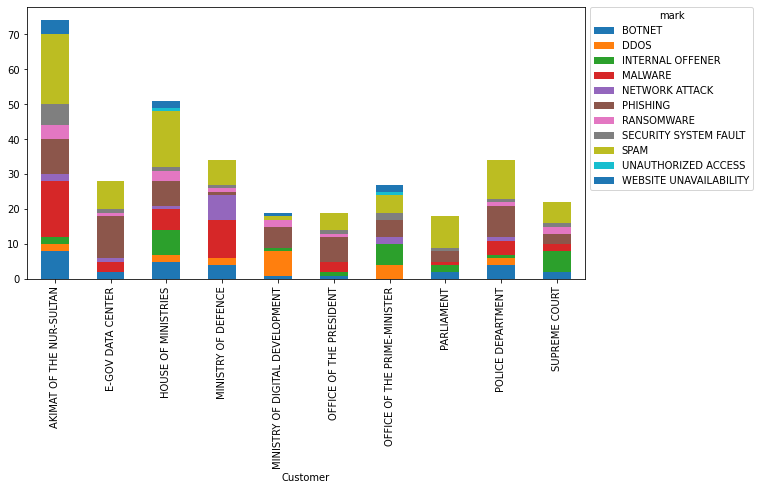

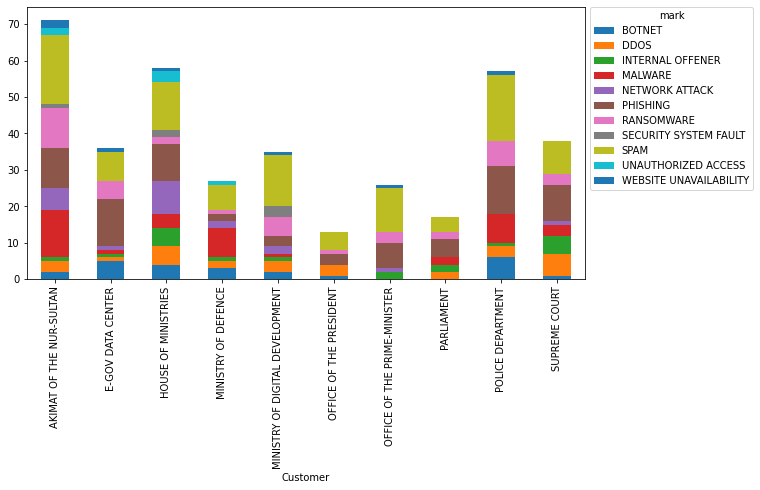

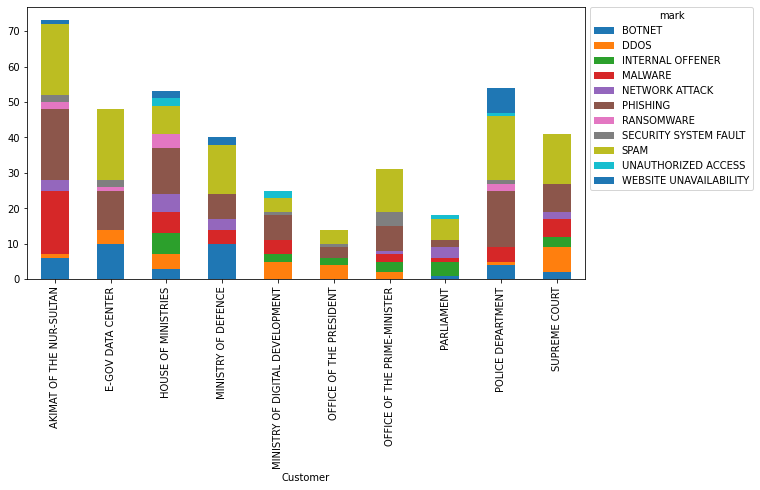

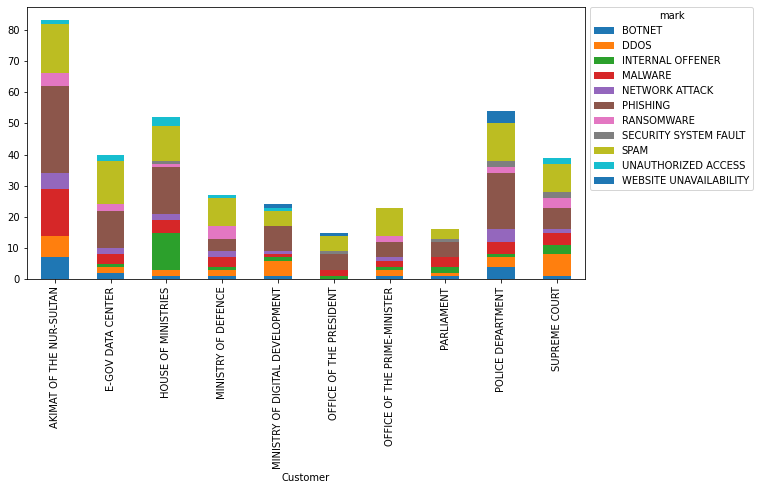

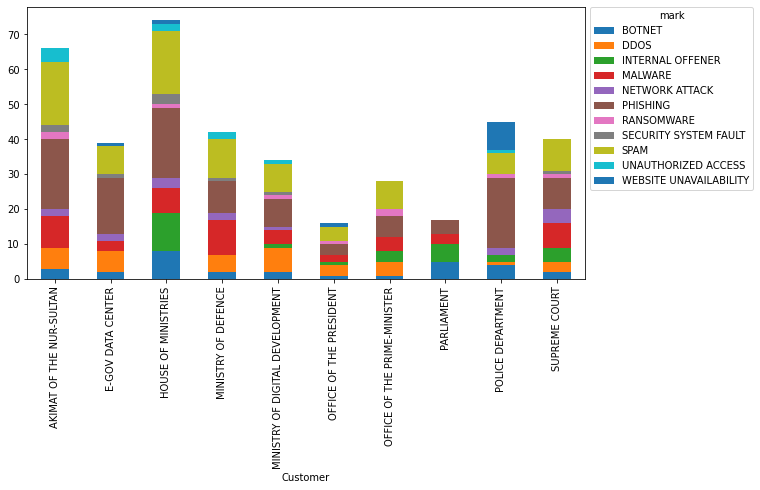

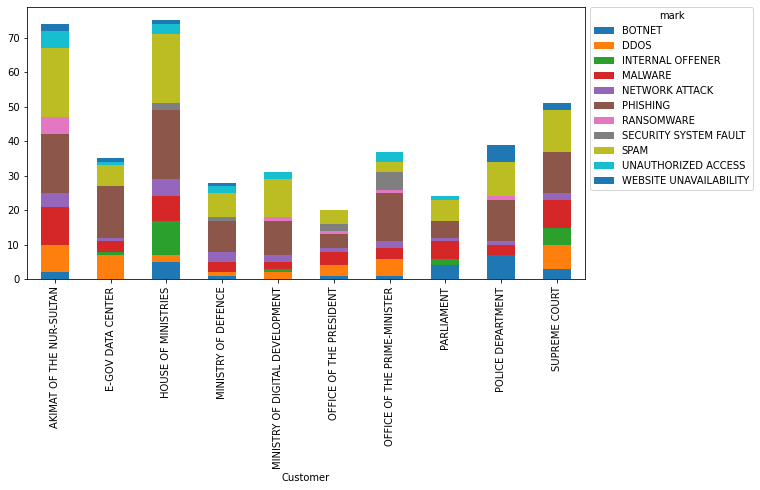

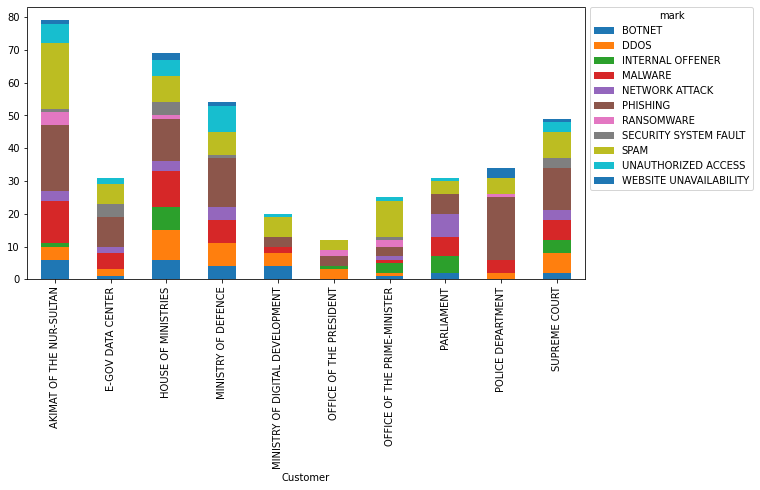

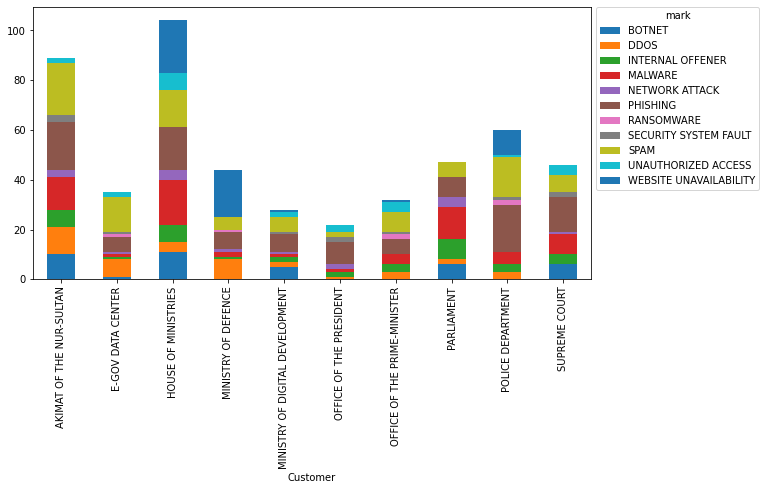

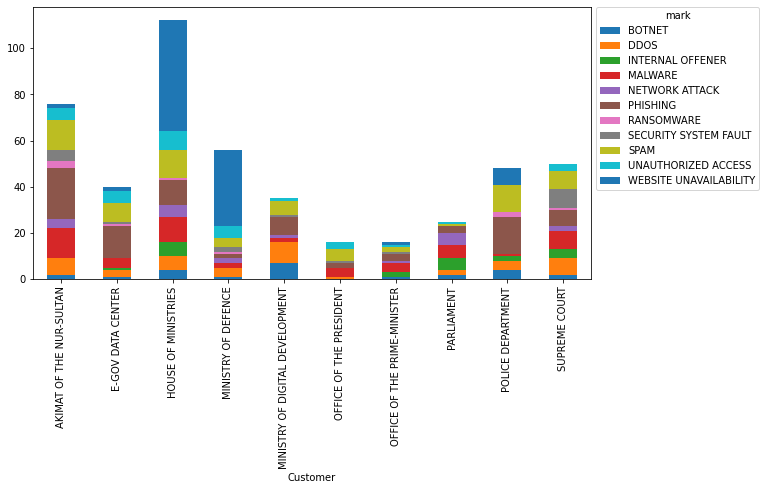

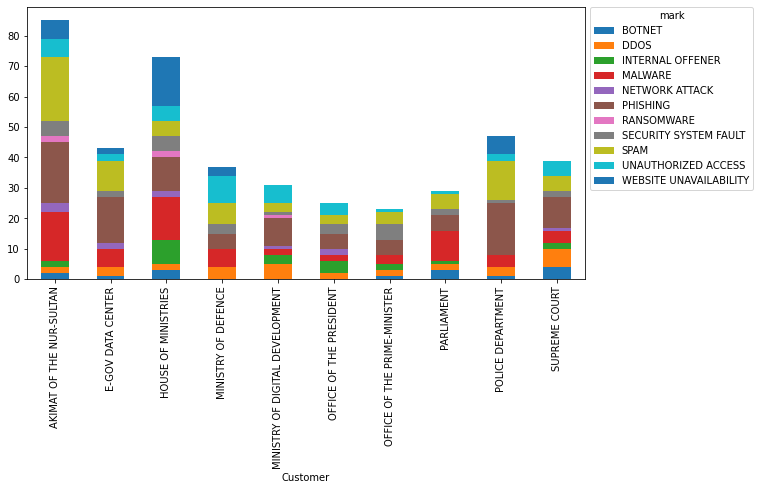

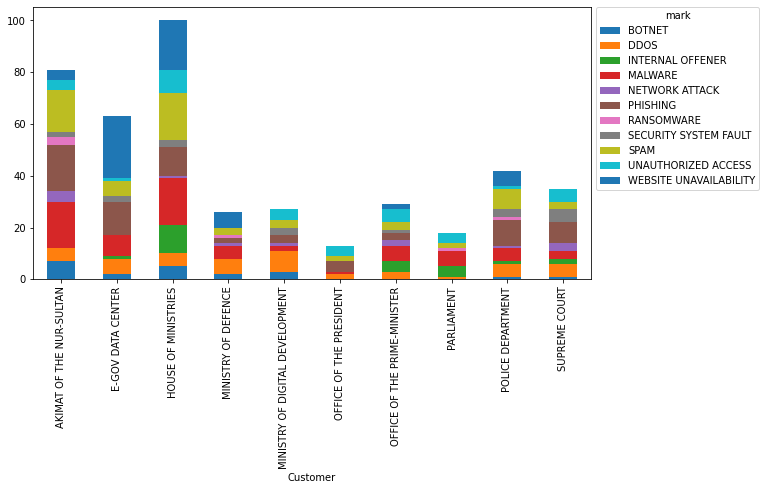

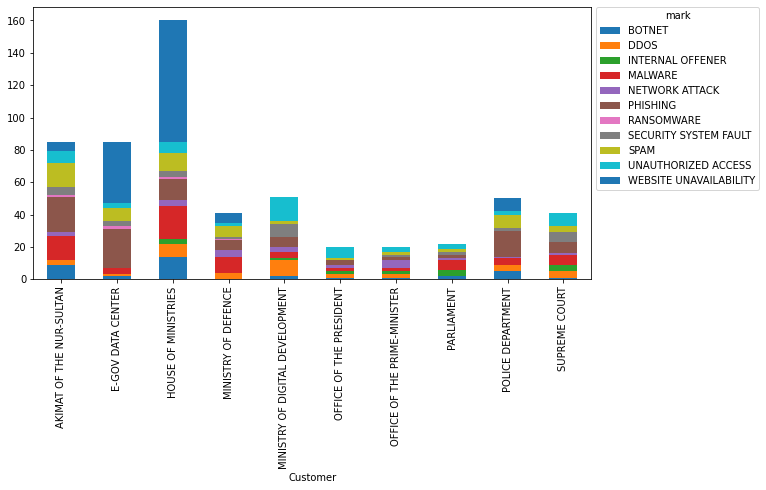

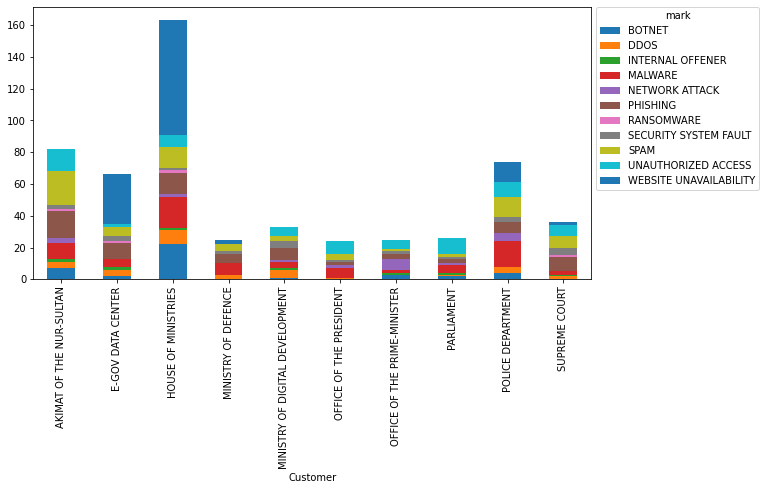

In [27]:
for hour in range(24):
    new_data2 = new_data[new_data['Hour'] == hour].copy(True)

    ct = pd.crosstab(new_data2['Customer'], new_data2['Category'])

    ax = ct.plot(kind='bar', stacked=True, rot=90)
    ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

In [28]:
# observe dataset
new_data_XY = new_data[['Hour', 'Period', 'DoW', 'DoM', 'Month', 'Customer']].copy(True)
new_data_XY

,Hour,Period,DoW,DoM,Month,Customer
0,22,7,3,29,4,E-GOV DATA CENTER
1,21,7,3,29,4,OFFICE OF THE PRIME-MINISTER
2,18,6,3,29,4,HOUSE OF MINISTRIES
3,18,6,3,29,4,HOUSE OF MINISTRIES
4,18,6,3,29,4,HOUSE OF MINISTRIES
...,...,...,...,...,...,...
9539,0,0,0,1,1,AKIMAT OF THE NUR-SULTAN
9540,0,0,0,1,1,AKIMAT OF THE NUR-SULTAN
9541,0,0,0,1,1,MINISTRY OF DEFENCE
9542,19,6,6,31,12,E-GOV DATA CENTER


## 4. Stage Four - Modeling

### 4.1. Modeling Techniques

In [29]:
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [30]:
# convert strings to numbers
le = preprocessing.LabelEncoder()
new_data = new_data.apply(le.fit_transform)

In [31]:
# split dataset
train, test = train_test_split(new_data, test_size=0.2)

# select data
train_X = train[['Hour', 'DoW', 'DoM', 'Month']].copy(True)
train_Y = train[['Customer']].copy(True)

test_X = test[['Hour', 'DoW', 'DoM', 'Month']].copy(True)
test_Y = test[['Customer']].copy(True)

In [32]:
print(train_X)

      Hour  DoW  DoM  Month
3885     8    0   27      9
8244    22    2   29      4
5566    18    1   15      3
7927     7    0    8      6
9321    13    4   25      0
...    ...  ...  ...    ...
8635    21    3   18      3
1754     1    5    7      7
3278    21    5   10      0
5036     0    5   14      5
8393     5    2   15      4

[7635 rows x 4 columns]


In [33]:
print(train_Y)

      Customer
3885         6
8244         4
5566         8
7927         1
9321         6
...        ...
8635         7
1754         9
3278         2
5036         2
8393         3

[7635 rows x 1 columns]


### 4.2. Modeling Assumptions

In [34]:
# no assumptions

### 4.3. Building Models

In [35]:
# GNB
gnb_clf = GaussianNB()
gnb_clf.fit(train_X, train_Y.values.ravel())
gnb_Y = gnb_clf.predict(test_X)

# KNN
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(train_X, train_Y.values.ravel())
knn_Y = knn_clf.predict(test_X)

# Decision Trees
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(train_X, train_Y.values.ravel())
tree_Y = tree_clf.predict(test_X)

# Random forest
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(train_X, train_Y.values.ravel())
rf_Y = rf_clf.predict(test_X)

#Multi-layer Perceptron
mlp_clf = MLPClassifier(alpha=1e-4, hidden_layer_sizes=(100, 60, 20, 10), random_state=1)
mlp_clf.fit(train_X, train_Y.values.ravel())
mlp_Y = mlp_clf.predict(test_X)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### 4.4. Assessing The Model

In [36]:
print(accuracy_score(test_Y.values.ravel(), gnb_Y))
print(accuracy_score(test_Y.values.ravel(), knn_Y))
print(accuracy_score(test_Y.values.ravel(), tree_Y))
print(accuracy_score(test_Y.values.ravel(), rf_Y))
print(accuracy_score(test_Y.values.ravel(), mlp_Y))

0.20167627029858565
0.24567836563645887
0.26663174436877946
0.26977475117862754
0.24724986904138294


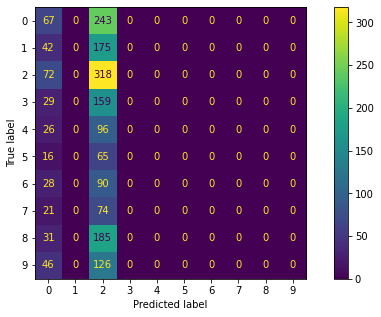

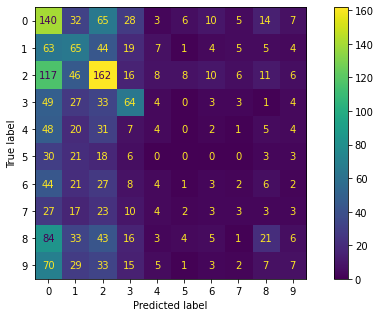

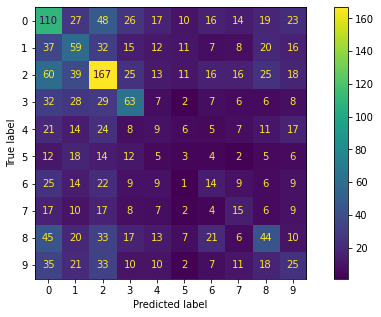

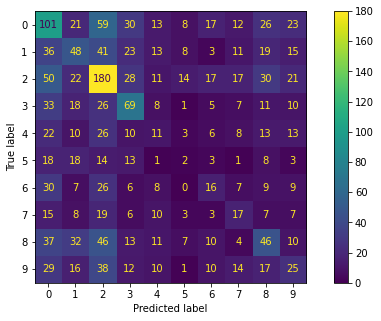

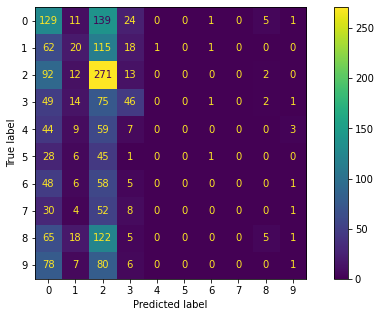

In [37]:
ConfusionMatrixDisplay.from_predictions(test_Y.values.ravel(), gnb_Y)
ConfusionMatrixDisplay.from_predictions(test_Y.values.ravel(), knn_Y)
ConfusionMatrixDisplay.from_predictions(test_Y.values.ravel(), tree_Y)
ConfusionMatrixDisplay.from_predictions(test_Y.values.ravel(), rf_Y)
ConfusionMatrixDisplay.from_predictions(test_Y.values.ravel(), mlp_Y)